Omega Centauri Globular Cluster Orbital Plot using gala
(an Astropy-affiliated Python package)

In [1]:
import astropy
import astropy.units as u

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Gala Imports
from gala.mpl_style import mpl_style
plt.style.use(mpl_style)
import gala.dynamics as gd
import astropy.coordinates as coord
import gala.integrate as gi
import gala.potential as gp
from gala.units import galactic

Omega Centauri (NGC 5139) parameters (from Vasiliev)

In [2]:
RA = 201.697
DEC = -47.480
D = 5.2
Vlos = 232.7
eVlos = 0.2
PMRA = -3.215
PMDEC = -6.761
ePMRA = 0.003
ePMDEC = 0.003
corrPM = -0.119
radius = 40.0
Nmember = 68783

In [3]:
potential = gp.MilkyWayPotential()
            
icrs = coord.SkyCoord(ra=coord.Angle(str(RA)+'d'), # d denotes degrees
                      dec=coord.Angle(str(DEC)+'d'), # d denotes degrees
                      distance=5.2*u.kpc,
                      pm_ra_cosdec=PMRA*u.mas/u.yr,
                      pm_dec=PMDEC*u.mas/u.yr,
                      radial_velocity=Vlos*u.km/u.s)

icrs_err = coord.SkyCoord(ra=0*u.deg, dec=0*u.deg, distance=0*u.kpc,
                          pm_ra_cosdec=ePMRA*u.mas/u.yr,
                          pm_dec=ePMDEC*u.mas/u.yr,
                          radial_velocity=eVlos*u.km/u.s)

gc_frame = coord.Galactocentric()

galcen = icrs.transform_to(gc_frame)

w0 = gd.PhaseSpacePosition(galcen.data)

n_steps = 10000, dt = 0.5: 5 Gyr into the future

(I will be integrating 5 Gyr backwards in time from the present)

In [4]:
orbit = potential.integrate_orbit(w0, dt=-0.5*u.Myr, n_steps=10000)

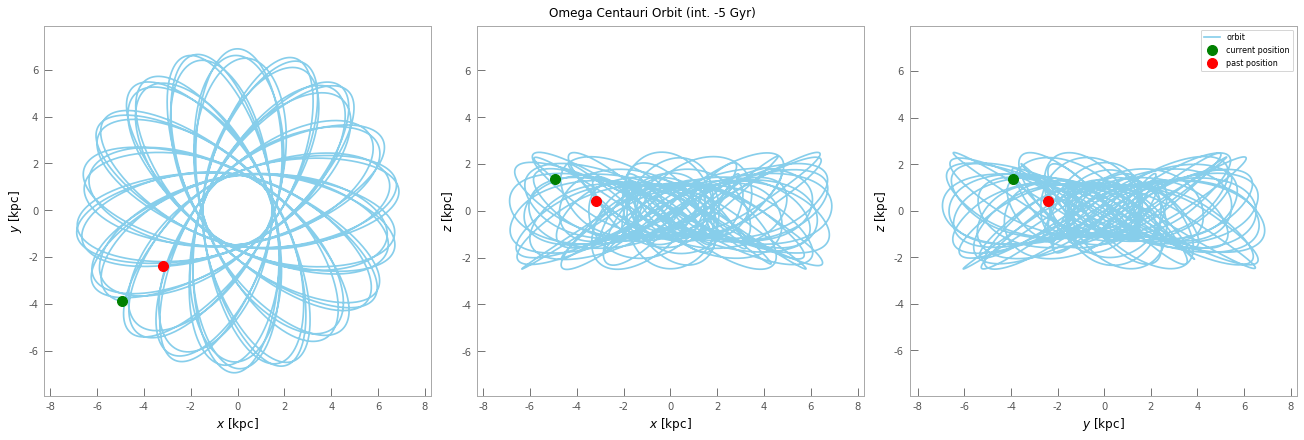

In [5]:
fig = orbit.plot(c = 'skyblue')

# Index of current position
_ = 0 

# Index of past position
__ = 10000 

# Plot current position in x,y,z
plt.gcf().get_axes()[0].plot(orbit.x[_], orbit.y[_],'go', ms = 10)
plt.gcf().get_axes()[1].plot(orbit.x[_], orbit.z[_],'go', ms = 10)
plt.gcf().get_axes()[2].plot(orbit.y[_], orbit.z[_],'go', ms = 10)
     
# Plot past position in x,y,z
plt.gcf().get_axes()[0].plot(orbit.x[__], orbit.y[__],'ro', ms = 10)
plt.gcf().get_axes()[1].plot(orbit.x[__], orbit.z[__],'ro', ms = 10)
plt.gcf().get_axes()[2].plot(orbit.y[__], orbit.z[__],'ro', ms = 10)

plt.legend(['orbit', 'current position', 'past position'],
           prop={'size': 8})

plt.suptitle('Omega Centauri Orbit (int. -5 Gyr)')

fig = plt.gcf()
fig.set_size_inches(18,6)